In [1]:
import sys
import os
# Add the parent directory to the Python path
sys.path.append(os.path.abspath("../scripts"))
from telecom_user_engagement_analysis import TelecomUserEngagement
import db_config

### load dataset
#### SQL query to fetch the required dataset

In [2]:
# load dataset
# SQL query to fetch the required dataset
QUERY = "SELECT * FROM xdr_data"

### Initialize the analysis class with the SQL query

In [3]:
data=db_config.fetch_data(QUERY)

In [4]:
# Initialize the class with the dataset path
engagement_analysis = TelecomUserEngagement(data)


#### Aggregate metrics


In [5]:
engagement_analysis.aggregate_metrics()

### Get top customers for each metric


In [6]:
top_sessions = engagement_analysis.get_top_customers('Bearer Id')
top_duration = engagement_analysis.get_top_customers('Dur. (ms)')
top_traffic = engagement_analysis.get_top_customers('Total Traffic (Bytes)')

### Display results


In [7]:
print("Top 10 Customers by Sessions Frequency:")
display(top_sessions)

print("\nTop 10 Customers by Session Duration:")
display(top_duration)

print("\nTop 10 Customers by Total Traffic:")
display(top_traffic)

Top 10 Customers by Sessions Frequency:


,MSISDN/Number,Bearer Id
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
666,3.360313e+10,12
1279,3.360452e+10,12
13994,3.362708e+10,12



Top 10 Customers by Session Duration:


,MSISDN/Number,Dur. (ms)
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0
92577,3.376041e+10,5321667.0



Top 10 Customers by Total Traffic:


,MSISDN/Number,Total Traffic (Bytes)
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
13526,3.362632e+10,7.971167e+09
76363,3.367588e+10,7.891111e+09
37052,3.365973e+10,7.705863e+09
63028,3.366646e+10,7.308501e+09
92577,3.376041e+10,7.132371e+09
57241,3.366471e+10,6.872018e+09
86455,3.369879e+10,6.540899e+09


### Plot results


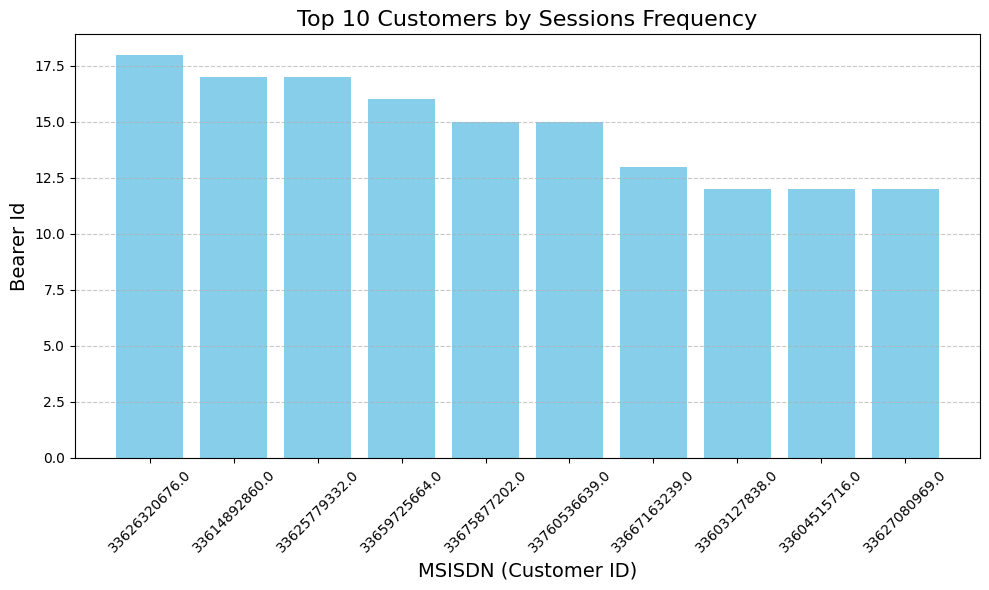

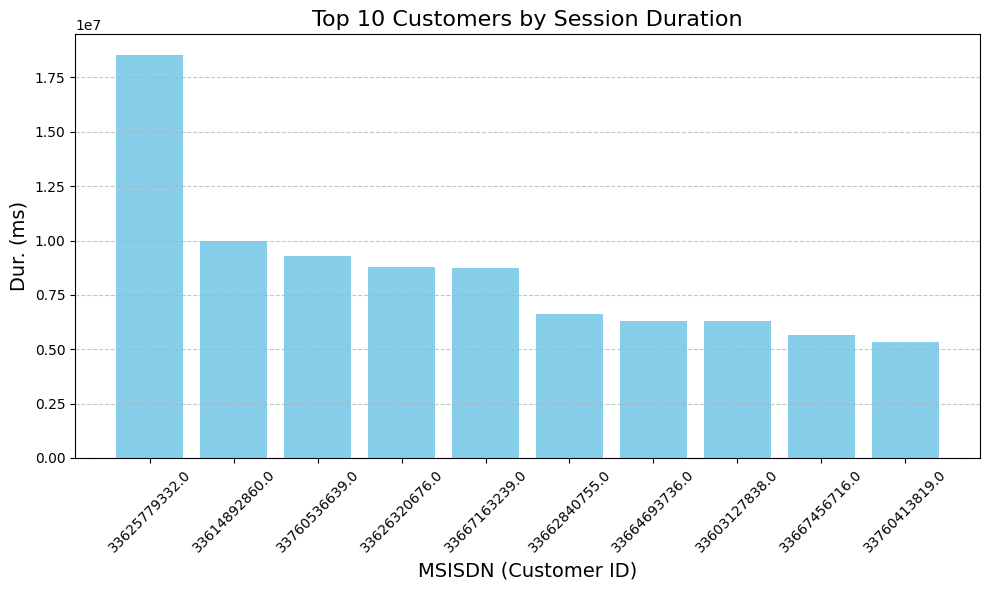

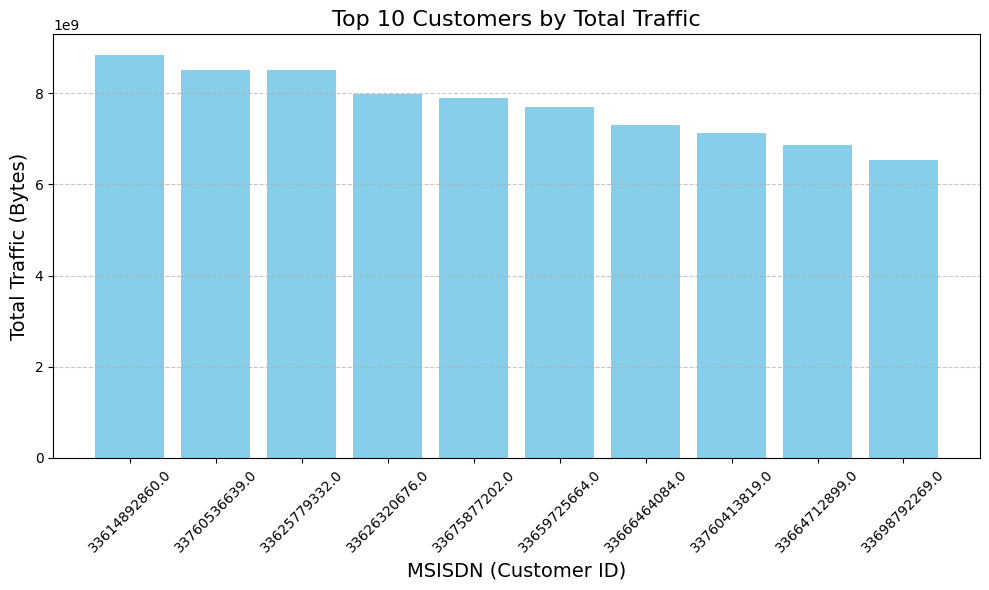

In [8]:

engagement_analysis.plot_top_customers('Bearer Id', 'Top 10 Customers by Sessions Frequency')
engagement_analysis.plot_top_customers('Dur. (ms)', 'Top 10 Customers by Session Duration')
engagement_analysis.plot_top_customers('Total Traffic (Bytes)', 'Top 10 Customers by Total Traffic')


###  Normalize metrics


Clustered Data with Labels:


,MSISDN/Number,Bearer Id,Dur. (ms),Total Traffic (Bytes),Cluster
0,3.360100e+10,0.055556,0.005908,0.095931,2
1,3.360100e+10,0.055556,0.009387,0.014026,2
2,3.360100e+10,0.055556,0.006892,0.063851,2
3,3.360101e+10,0.055556,0.002304,0.044148,2
4,3.360101e+10,0.111111,0.001615,0.161598,0
...,...,...,...,...,...
106851,3.379000e+10,0.055556,0.000090,0.077317,2
106852,3.379000e+10,0.055556,0.007217,0.050727,2
106853,3.197021e+12,0.055556,0.046922,0.022566,2
106854,3.370000e+14,0.055556,0.013258,0.063887,2


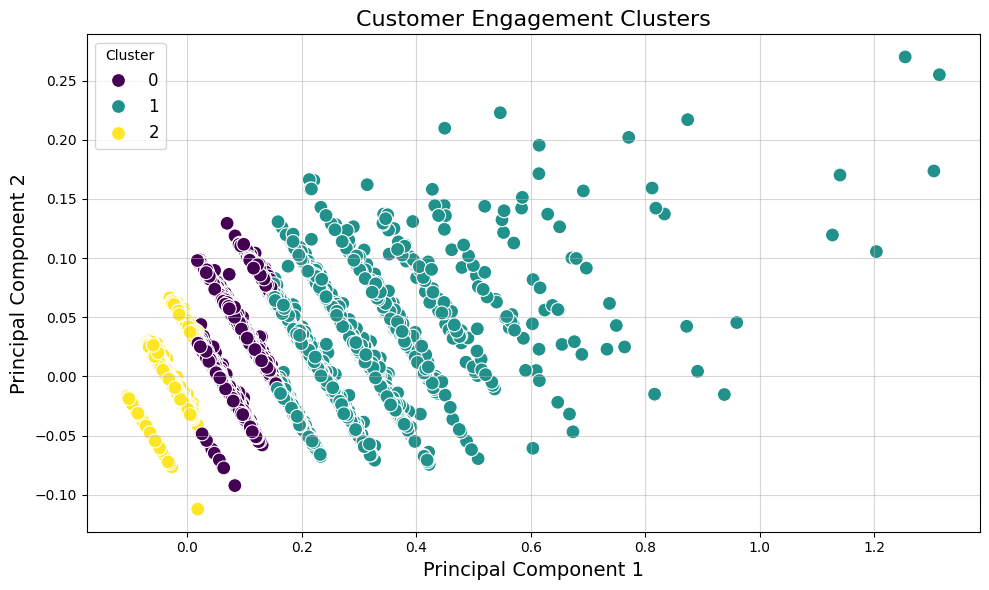

In [9]:
# Normalize metrics
engagement_analysis.normalize_metrics()

# Run K-means clustering
engagement_analysis.run_kmeans(n_clusters=3)

# Print results
print("Clustered Data with Labels:")
display(engagement_analysis.normalized_data[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total Traffic (Bytes)', 'Cluster']])

# Visualize the clusters
engagement_analysis.plot_clusters()

### Aggregate user total traffic per application


In [10]:
engagement_analysis.aggregate_traffic_per_application()

###  Display top 10 users per application


In [11]:
for app, top_users in engagement_analysis.top_app_users.items():
    print(f"Top 10 Users for {app}:")
    display(top_users)

Top 10 Users for Social Media:


,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Social Media Traffic (Bytes),Total Google Traffic (Bytes),Total Youtube Traffic (Bytes)
13526,3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,43374779.0,152191852.0,374483047.0
92923,3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,39783189.0,123223099.0,396289198.0
37052,3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0,35412358.0,116516345.0,257991088.0
6437,3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,28294544.0,127973787.0,394370218.0
13180,3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,27135500.0,142307915.0,452958769.0
65118,3.366716e+10,23753753.0,494097.0,71707826.0,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,146007082.0,4.623424e+09,102197663.0,4.837534e+09,103984990.0,24247850.0,105032696.0,315231310.0
106137,3.378632e+10,23568655.0,406264.0,78819810.0,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,142337088.0,4.740903e+09,110192303.0,4.172594e+09,79892668.0,23974919.0,110254484.0,214763912.0
70960,3.366907e+10,23477047.0,323787.0,54915216.0,22909468.0,17813584.0,5109829.0,136295265.0,100107539.0,78923699.0,133085331.0,3.166462e+09,102690051.0,4.540939e+09,64429870.0,23800834.0,77824684.0,236402804.0
666,3.360313e+10,22776679.0,301146.0,73942055.0,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,104401875.0,4.108482e+09,82962892.0,6.222705e+09,103966155.0,23077825.0,86929016.0,284090139.0
31331,3.365849e+10,22695673.0,304393.0,55457602.0,20976541.0,15004556.0,4673135.0,64799443.0,118464776.0,78217369.0,108576562.0,2.071045e+09,54024030.0,4.239611e+09,75899582.0,23000066.0,76434143.0,183264219.0


Top 10 Users for Google:


,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Social Media Traffic (Bytes),Total Google Traffic (Bytes),Total Youtube Traffic (Bytes)
13526,3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,43374779.0,152191852.0,374483047.0
13180,3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,27135500.0,142307915.0,452958769.0
6437,3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,28294544.0,127973787.0,394370218.0
92923,3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,39783189.0,123223099.0,396289198.0
37052,3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0,35412358.0,116516345.0,257991088.0
106137,3.378632e+10,23568655.0,406264.0,78819810.0,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,142337088.0,4.740903e+09,110192303.0,4.172594e+09,79892668.0,23974919.0,110254484.0,214763912.0
76363,3.367588e+10,18655364.0,567557.0,83002994.0,26857508.0,24284723.0,7229698.0,158665235.0,158745337.0,161626462.0,147466697.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0,19222921.0,109860502.0,317410572.0
65118,3.366716e+10,23753753.0,494097.0,71707826.0,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,146007082.0,4.623424e+09,102197663.0,4.837534e+09,103984990.0,24247850.0,105032696.0,315231310.0
94654,3.376127e+10,14201427.0,294653.0,72949803.0,24140185.0,15768841.0,4984880.0,119056471.0,153733121.0,167261139.0,124830202.0,4.165410e+09,108689309.0,4.997985e+09,79794752.0,14496080.0,97089988.0,272789592.0
86313,3.369876e+10,15121125.0,375123.0,69459339.0,22475812.0,22948083.0,5491624.0,128037504.0,123384587.0,133582678.0,147229770.0,5.022608e+09,95772666.0,4.446847e+09,85776403.0,15496248.0,91935151.0,251422091.0


Top 10 Users for Youtube:


,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Social Media Traffic (Bytes),Total Google Traffic (Bytes),Total Youtube Traffic (Bytes)
13180,3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,27135500.0,142307915.0,452958769.0
92923,3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,39783189.0,123223099.0,396289198.0
6437,3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,28294544.0,127973787.0,394370218.0
13526,3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,43374779.0,152191852.0,374483047.0
76363,3.367588e+10,18655364.0,567557.0,83002994.0,26857508.0,24284723.0,7229698.0,158665235.0,158745337.0,161626462.0,147466697.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0,19222921.0,109860502.0,317410572.0
65118,3.366716e+10,23753753.0,494097.0,71707826.0,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,146007082.0,4.623424e+09,102197663.0,4.837534e+09,103984990.0,24247850.0,105032696.0,315231310.0
13994,3.362708e+10,17438671.0,370240.0,62722401.0,24403520.0,17353955.0,6213264.0,187323322.0,121467452.0,144623204.0,122417693.0,4.880017e+09,92335582.0,5.039747e+09,78044196.0,17808911.0,87125921.0,308790774.0
92577,3.376041e+10,20515774.0,261431.0,56331853.0,26406867.0,21791296.0,3785669.0,174245981.0,128923126.0,167023809.0,151323737.0,6.170943e+09,97676681.0,3.988504e+09,113141379.0,20777205.0,82738720.0,303169107.0
86455,3.369879e+10,15390784.0,337377.0,59943992.0,19792133.0,24165599.0,4893443.0,166900329.0,135761629.0,103027247.0,165220233.0,5.641128e+09,112614999.0,4.598153e+09,91723291.0,15728161.0,79736125.0,302661958.0
666,3.360313e+10,22776679.0,301146.0,73942055.0,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,104401875.0,4.108482e+09,82962892.0,6.222705e+09,103966155.0,23077825.0,86929016.0,284090139.0


###  Plot the top 3 most used applications

Social Media: 272,265,542,092.0 Bytes
Google: 1,162,853,412,220.0 Bytes
Youtube: 3,372,204,313,367.0 Bytes


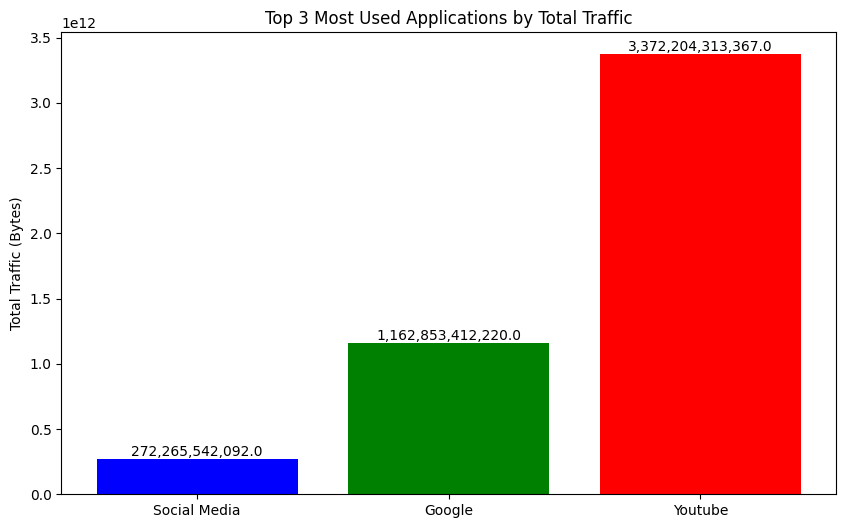

In [12]:
engagement_analysis.plot_top_applications()

### Use elbow method to determine optimal k


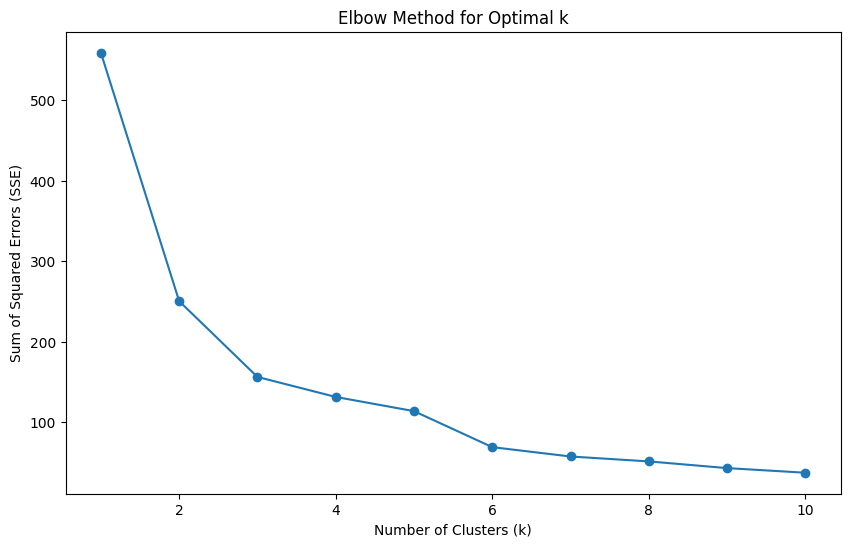

In [13]:
engagement_analysis.elbow_method()